In [6]:
import duckdb 
df = duckdb.query("select * from read_parquet('c:/git/wikistats/data/enriched/*enriched.parquet', union_by_name = true)").to_df()
df

,timestamp,user,title,comment,bot,minor,server_name,wiki,length_new,length_old,wikidata_id,instance_of,subclass_of
0,1770218739,Pls dont ask,Clix (gamer),,False,<NA>,en.wikipedia.org,enwiki,NaN,NaN,Q84589368,[Q5],[]
1,1770218736,"Walrus, i am the",Category:AfC pending submissions by age/0 days...,[[:Draft:Finjuve]] added to category,False,<NA>,en.wikipedia.org,enwiki,NaN,NaN,Q15144338,[Q4167836],[]
2,1770218739,Bender235,Q135775295,/* wbsetclaim-create:2||1 */ [[Property:P2671]...,False,False,www.wikidata.org,wikidatawiki,5470.0,5114.0,None,[],[]
3,1770218736,"Walrus, i am the",Category:AfC submissions by date/04 February 2026,[[:Draft:Finjuve]] added to category,False,<NA>,en.wikipedia.org,enwiki,NaN,NaN,None,[],[]
4,1770218739,Pls dont ask,Clix (gamer),,False,<NA>,en.wikipedia.org,enwiki,NaN,NaN,Q84589368,[Q5],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,1770218883,911Timeliner,Category:English lemmas,[[:Buckendoon]] added to category,False,<NA>,en.wiktionary.org,enwiktionary,NaN,NaN,Q30524923,[Q4167836],[]
314,1770218883,911Timeliner,Category:English proper nouns,[[:Buckendoon]] added to category,False,<NA>,en.wiktionary.org,enwiktionary,NaN,NaN,Q30525299,[Q4167836],[]
315,1770218883,911Timeliner,Category:English uncountable nouns,[[:Buckendoon]] added to category,False,<NA>,en.wiktionary.org,enwiktionary,NaN,NaN,Q31157238,[Q4167836],[]
316,1770218883,911Timeliner,Category:Pages with entries,[[:Buckendoon]] added to category,False,<NA>,en.wiktionary.org,enwiktionary,NaN,NaN,Q128935336,[Q4167836],[]


In [2]:
from wikistats.enrichment.wikidata_enrichment import generate_label_mappings

generate_label_mappings()


Reading pageviews_20260130_134753_5011f41c_enriched.parquet…
Reading pageviews_20260130_134754_7c929c39_enriched.parquet…
Reading pageviews_20260130_163746_4b551307_enriched.parquet…
Reading pageviews_20260130_163747_4e343575_enriched.parquet…
Reading pageviews_20260131_153509_f0d434cc_enriched.parquet…
Reading pageviews_20260131_153510_0c78c005_enriched.parquet…
Reading pageviews_20260131_155112_8a7a99d2_enriched.parquet…
Reading pageviews_20260131_155113_2cdec2cd_enriched.parquet…
Reading pageviews_20260131_155114_403b0bb2_enriched.parquet…
Reading pageviews_20260131_160016_b651406e_enriched.parquet…
Reading pageviews_20260131_160017_1a16875e_enriched.parquet…
Reading pageviews_20260131_160018_82acfbb4_enriched.parquet…
Reading pageviews_20260131_160020_f51603bc_enriched.parquet…
Reading pageviews_20260131_160021_88b0d5cc_enriched.parquet…
Reading pageviews_20260131_160022_6a368a04_enriched.parquet…
Reading pageviews_20260131_160023_64f374ca_enriched.parquet…
Reading pageviews_202601

In [ ]:
import sys
from pathlib import Path

# Add src directory to path so we can import wikistats
# Assumes notebook is in notebooks/ folder at project root
src_dir = Path.cwd().parent / "src"
sys.path.insert(0, str(src_dir))

from wikistats.ingestion.stream_ingestion import ingest
from wikistats.enrichment.wikidata_enrichment import enrich

# Run the pipeline
files = ingest( timeout=10)
print(f"\nIngested files: {files}")
enrich(files)
print("Pipeline complete!")

In [3]:
# Load and display enriched data
enriched_df = duckdb.query("select * from read_parquet('c:/git/wikistats/data/enriched/*_enriched.parquet')").to_df()
print(f"Enriched data shape: {enriched_df.shape}")
enriched_df.head()

NameError: name 'duckdb' is not defined

Create wiki_language_region as Seed

In [7]:
from wikistats.enrichment.wiki_lookup import WIKI_LANGUAGE_REGION

WIKI_LANGUAGE_REGION
# convert to csv and save in wikistats_db/seeds
import pandas as pd
df_lang =pd.DataFrame.from_dict(WIKI_LANGUAGE_REGION, 
                       orient='index', 
                       columns=['region','language'])

df_lang.to_csv('c:/git/wikistats/wikistats_dbt/seeds/wiki_language_region.csv')    

View latest tables in warehouse duckdb

In [5]:
import duckdb

# Connect to your dev database
conn = duckdb.connect("C:\\git\\wikistats\\warehouse\\dev.duckdb", read_only=True)

try:
    # Check what's in the database
    print("Tables in main schema:")
    tables = conn.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'main'").fetchall()
    print(tables)
    
    # Query the materialized view
    print("\nSample data from stg_wikistats_enriched:")
    df = conn.execute("SELECT * FROM main.stg_wikistats_enriched").df()
    print(df)
    
    # Summary stats
    print("\nRow count:")
    print(conn.execute("SELECT COUNT(*) as row_count FROM main.stg_wikistats_enriched").fetchall())
    
finally:
    print("\nClosing the connection.")
    conn.close()  # Always close the connection

Tables in main schema:
[('seed_wiki_language_region',), ('stg_wikistats_enriched',)]

Sample data from stg_wikistats_enriched:
                                                 title          wiki  \
0                                         Clix (gamer)        enwiki   
1    Category:AfC pending submissions by age/0 days...        enwiki   
2    Category:AfC submissions by date/04 February 2026        enwiki   
3                                         Clix (gamer)        enwiki   
4                       Category:Draft AfC submissions        enwiki   
..                                                 ...           ...   
721  Category:Media contributed by the Digital Publ...   commonswiki   
722                       Категория:Слова из 5 букв/kk  ruwiktionary   
723  Category:Media contributed by the National Arc...   commonswiki   
724  Category:Media contributed by National Archive...   commonswiki   
725  Category:Digital Public Library of America fil...   commonswiki   

    wiki

In [25]:
df = duckdb.sql("select * from read_parquet('C:\\git\\wikistats\\data\\enriched\\pageviews_20260131_160017_1a16875e_enriched.parquet') limit 20").df()
display(df)

,timestamp,user,title,comment,bot,minor,server_name,wiki,length_new,length_old,wikidata_id,instance_of,subclass_of
0,1769875215,Syedashfaque.123,User:Syedashfaque.123/sandbox,adding {{dashboard.wikiedu.org sandbox}},False,False,en.wikipedia.org,enwiki,33.0,NaN,None,<NA>,<NA>
1,1769875215,Darrelljon,File:Personal-road-transport-vehicles-comparis...,added [[Category:Comparisons of objects]],False,True,commons.wikimedia.org,commonswiki,1075.0,1039.0,None,<NA>,<NA>
2,1769875215,Rkieferbot,"File:Andrey Kozelsky, ""Mossovet"" political mov...",Adding [[Category:Taken with Nikon Coolpix P51...,True,False,commons.wikimedia.org,commonswiki,9011.0,8968.0,None,<NA>,<NA>
3,1769875214,ReaperSox,Michel Aebischer,,False,False,en.wikipedia.org,enwiki,12687.0,12687.0,Q27469951,[Q5],<NA>
4,1769875212,Rastinition,Category:引文格式1维护：未识别语文类型,[[:青春小鸟 (电视剧)]]已添加至分类,False,<NA>,zh.wikipedia.org,zhwiki,NaN,NaN,Q18920933,[Q15647814],<NA>
5,1769875212,Rastinition,Category:含有英語的條目,[[:青春小鸟 (电视剧)]]已添加至分类,False,<NA>,zh.wikipedia.org,zhwiki,NaN,NaN,Q9470035,[Q15647814],<NA>
6,1769875212,Rastinition,Category:2025年新加坡電視劇集,[[:青春小鸟 (电视剧)]]已添加至分类,False,<NA>,zh.wikipedia.org,zhwiki,NaN,NaN,None,<NA>,<NA>
7,1769875212,Rastinition,Category:怀疑侵犯版权页面,[[:青春小鸟 (电视剧)]]已从分类中移除,False,<NA>,zh.wikipedia.org,zhwiki,NaN,NaN,Q4616504,"[Q15647814, Q4167836]",<NA>
8,1769875215,"Well, Well, Bot!",Лента новостей 13 августа 2016 года,фикс прямых ссылок на редактирование страницы ...,True,True,ru.wikinews.org,ruwikinews,2665.0,2694.0,Q135779218,[Q94574287],<NA>
9,1769875214,Nehworry,Плачевная речь по Карлу XI,/* Графические особенности */ исправление,False,True,ru.wikipedia.org,ruwiki,15489.0,15323.0,Q18618794,[Q861911],<NA>


Nodes: 280, Edges: 228
Closing connection.


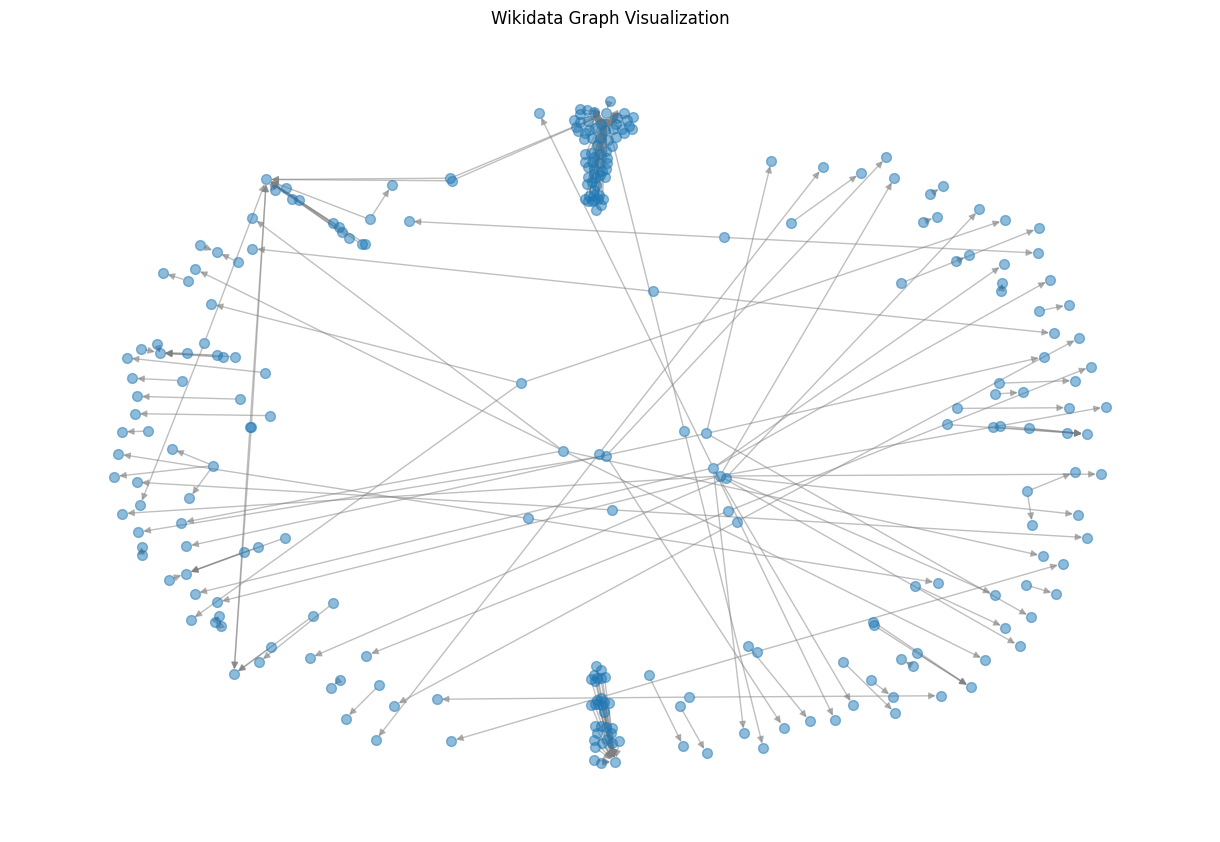

In [ ]:
# Close any existing connections
import gc
gc.collect()

# Then connect
import matplotlib.pyplot as plt 
import duckdb
import networkx as nx

# try to connect but exit and relinquish if fails (e.g. due to lock)

conn = duckdb.connect("c:/git/wikistats/warehouse/dev.duckdb")

try:    
    conn = duckdb.connect("c:/git/wikistats/warehouse/dev.duckdb")
    edges = conn.execute("SELECT source_qid, target_qid FROM dim_edges").fetchall()

    G = nx.DiGraph()
    G.add_edges_from(edges)
    print(f"Nodes: {len(G.nodes())}, Edges: {len(G.edges())}")
#close connection finally:
finally:
    print("Closing connection.")
    conn.close()

# generate visualization of the graph using networkx and matplotlib

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=50, edge_color='gray', alpha=0.5)
plt.title("Wikidata Graph Visualization")
plt.show()

In [ ]:
conn = duckdb.connect("c:/git/wikistats/warehouse/dev.duckdb")
df = conn.sql("select * from dim_edges").df()
display(df)
conn.close()

,source_qid,target_qid,relationship_type
0,Q84589368,Q5,instance_of
1,Q15144338,Q4167836,instance_of
2,Q84589368,Q5,instance_of
3,Q8389259,Q4167836,instance_of
4,Q369903,Q484170,instance_of
...,...,...,...
294,Q930383,Q132311,subclass_of
295,Q930383,Q19765983,subclass_of
296,Q930383,Q738473,subclass_of
297,Q3046735,Q187634,subclass_of
